`NAME: `NGABO RUSHAYIGI Prince <br>
`CLASS: ` 3A ROBOTIQUE <br>
`SEMESTER: `2 <br>
`SCHOOL: `ESIREM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, tree
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, RANSACRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from skimage import io
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import Isomap
import os
import re
from sklearn.tree import export_graphviz
import graphviz
from skimage.measure import moments, moments_hu, moments_central, moments_normalized
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import linregress
from scipy.special import expit
random_state = 170
common_params = {
    "n_init": 10,
    "random_state": random_state,
}

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]


# Examen - Analyse de Données
* Deadline: 09/04/2023, 23h59
* A rendre sur Teams (section Devoirs)
* Les objectifs pédagogiques de cet examen sont les suivants:
  * Capacités de programmation basiques en Python
  * Capacités de programmation avancées en Python
  * Capacités de réflexion quand présenté avec un problème nouveau
  * Capacité à mobiliser les connaissances dans le cadre d'un problème nouveau.
  * Capacité d'interpréter avec recul et objectivité des résultats statistiques.
  * Capacité à choisir les outils convenables pour un problème donné.
* L'examen est long, ne commencez pas deux heures avant la deadline.

## Exercice - Interprétation de données (6 pts)


### Q1
* Imprimer, avec la fonction `print`, les noms des classes ainsi que les noms des features du dataset "Iris" (2pts)

In [2]:

iris = datasets.load_iris()

X = iris.data[:, :4]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
print (f'classes : {target_names}') 
print (f'features : {feature_names}')

classes : ['setosa' 'versicolor' 'virginica']
features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


`Remark`
With the function `print `with a prefix `f `and i was able to display the Classes and Features   

### Q2
On veut pouvoir visualiser les données présentes dans le dataset Iris d'une manière convenable.

Quel type de méthode peut-on utiliser ? Justifier la réponse et décriver la méthode utilisée. (3pts)

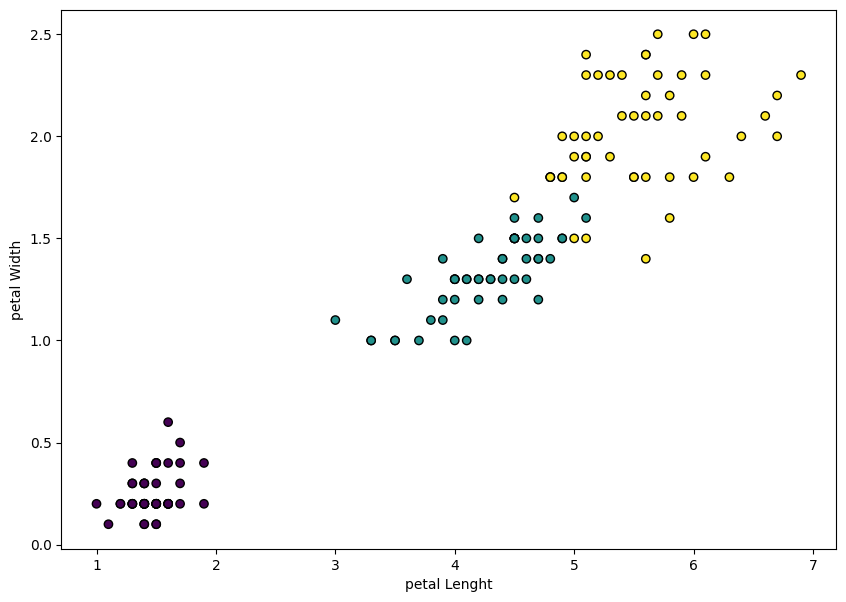

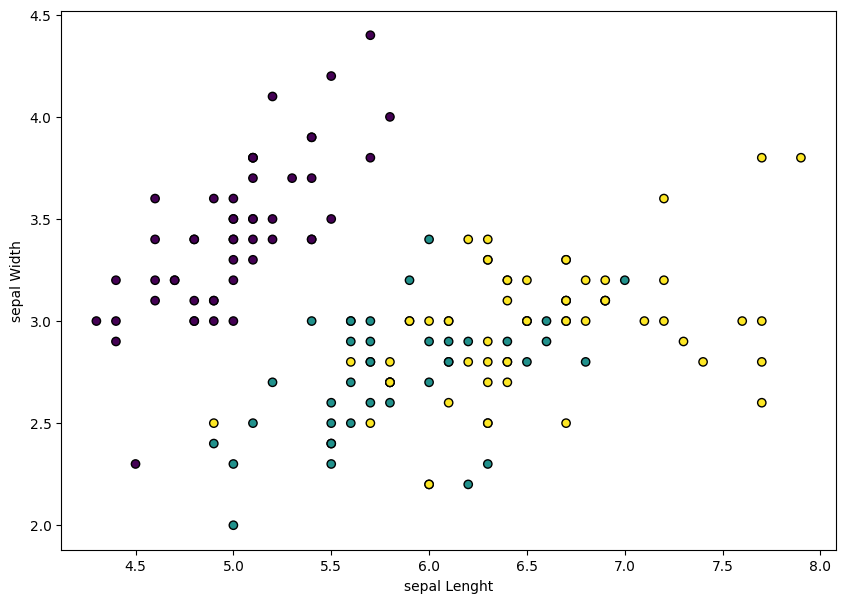

In [3]:
#petals
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('petal Lenght')
plt.ylabel('petal Width')
plt.show()

#sepals
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('sepal Lenght')
plt.ylabel('sepal Width')
plt.show()

`Answer: `The scatter plot function in Matplotlib is an effective tool for visually exploring the Iris dataset. By using this function, we can quickly identify patterns and potential issues in the data. Furthermore, we can differentiate the data based on their Petal and Sepal length and width, which allows us to gain further insight into the relationships between the variables. Overall, the scatter plot function in Matplotlib is a powerful tool that can aid in the analysis and interpretation of the Iris dataset.

### Q3
Ce dataset se prête facilement à un certain type de tâche: lequel ? Justifiez. (1 pts)

`Answer: `This Dataset is well-suited for the task of classification due to the 3 different groups of several individuals each with well-defined nature of its features. 


## Exercice - Clustering (11 pts)

Cet exercice a pour but de vérifier les hypothèses validées par un modèle K-Means.

### Q1
Décrivez le fonctionnement du code ci-dessous et le contenu des 4 datasets (décrire brièvement) (1+2pts)

In [4]:
n_samples = 1500
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state) # Dataset 1
X_2 = np.dot(X, transformation)  # Dataset 2
X_3, y_3 = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Dataset 3
X_4 = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
) # Dataset 4
y_4 = [0] * 500 + [1] * 100 + [2] * 10

`Answer: `
* Dataset 1: is a synthetic dataset consisting of `1500 samples ` generated using the `make_blobs ` function from scikit-learn with `uniform standard deviation `. The make_blobs function is a tool used for creating artificial datasets with a specified number of clusters and standard deviation.
* Dataset 2: is a linearly transformed dataset created by applying a `transformation matrix `to the original dataset using the `dot method `from numpy. The transformation matrix is used to stretch, rotate, and translate the original data points. This type of dataset is useful for evaluating the `robustness of clustering algorithms `to linear transformations.
* Dataset 3: is a `complex dataset `generated using the `make_blobs `function with `non-uniform standard deviation`. This type of dataset is useful for evaluating the performance of clustering algorithms under challenging conditions, such as when the clusters are `overlapping `or have `different densities`.
* Dataset 4: is a `merged ` dataset created by `combining ` data from the first `three datasets `using the `vstack `function from numpy. The merged dataset contains a total of `610 samples `and has corresponding labels manually created based on the individual dataset labels. This type of dataset is useful for evaluating the performance of `clustering algorithms` on `heterogeneous datasets` and assessing their ability to handle different cluster structures.


### Q2
Le code suivant permet de visualiser les données:

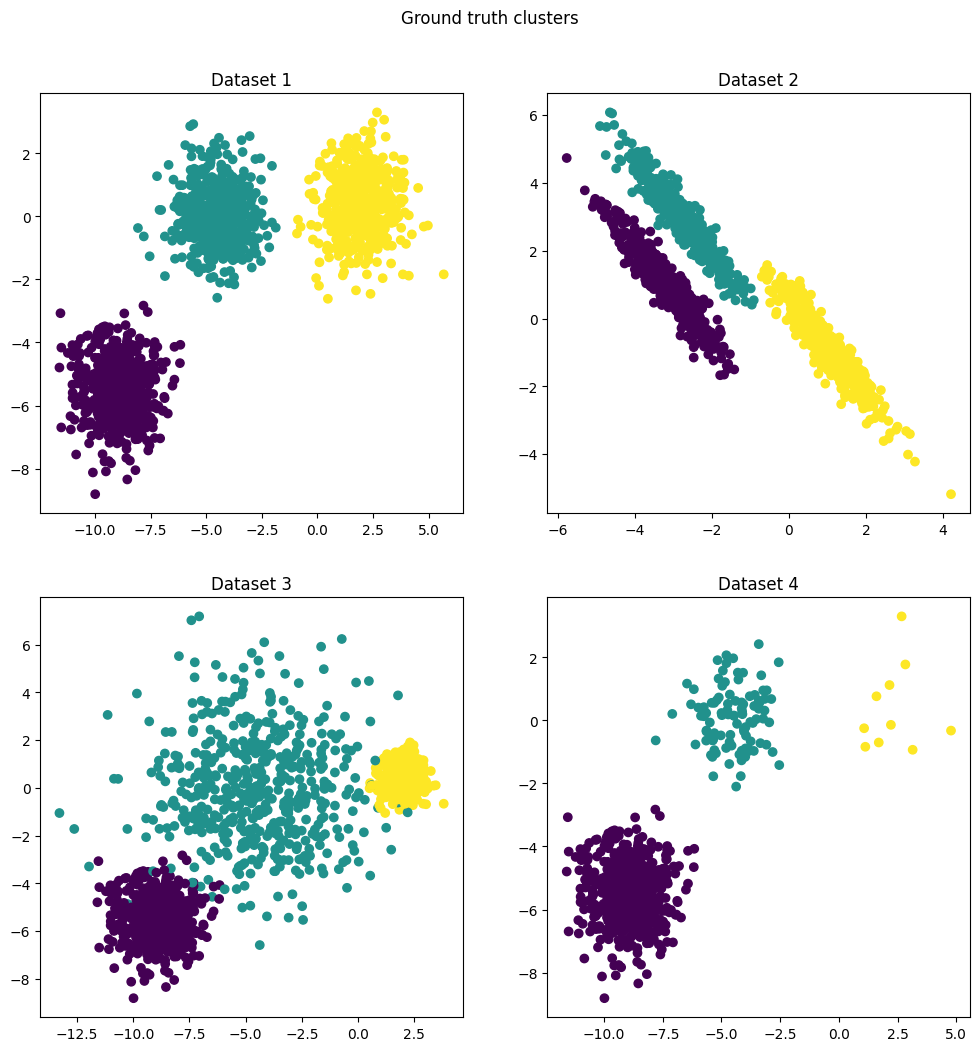

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Dataset 1")

axs[0, 1].scatter(X_2[:, 0], X_2[:, 1], c=y)
axs[0, 1].set_title("Dataset 2")

axs[1, 0].scatter(X_3[:, 0], X_3[:, 1], c=y_3)
axs[1, 0].set_title("Dataset 3")

axs[1, 1].scatter(X_4[:, 0], X_4[:, 1], c=y_4)
axs[1, 1].set_title("Dataset 4")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

* En vous inspirant du code ci-dessus, présenter les résultats de l'application de KMeans sur les 4 datasets et interprétez les figures (5pts)

Indication : changer les titres des figures pour les rendre plus explicites sera une très bonne chose !

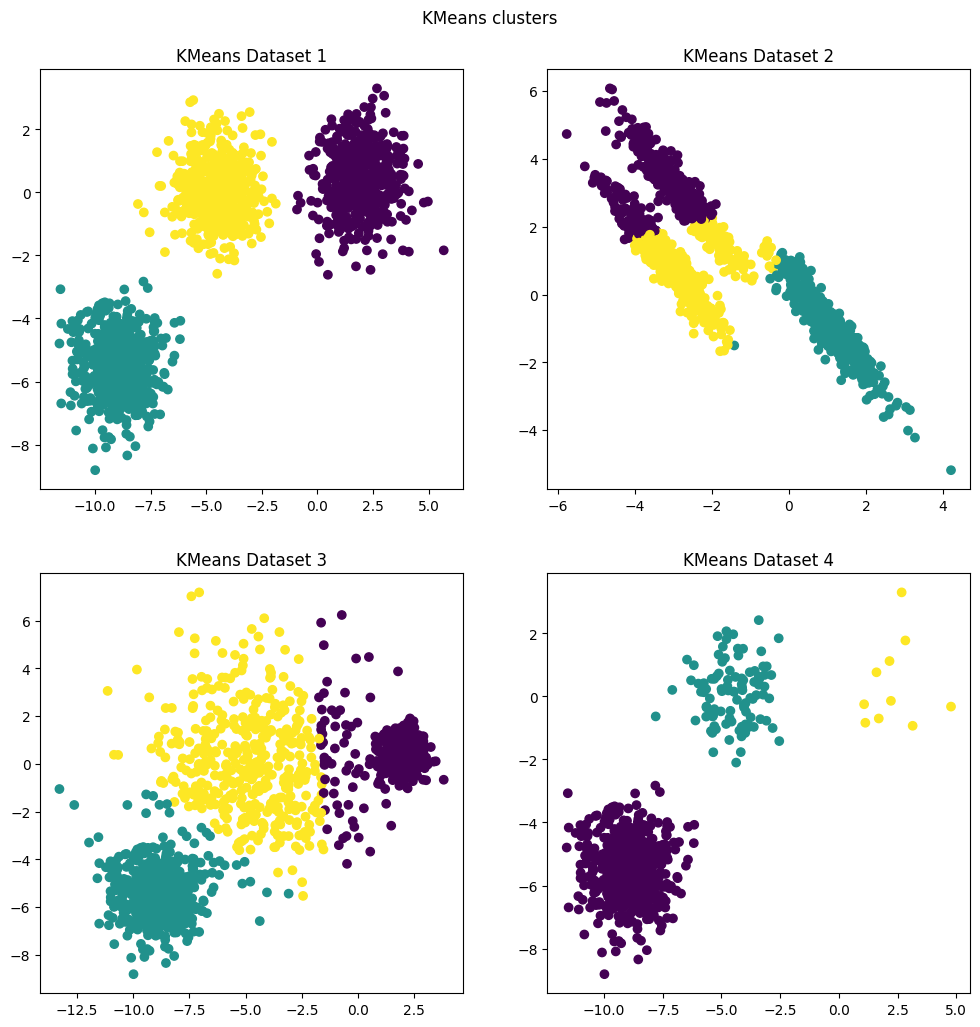

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# KMeans for the first Dataset
y = KMeans(n_clusters=3, **common_params).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("KMeans Dataset 1")

# KMeans for the second Dataset
y = KMeans(n_clusters=3, **common_params).fit_predict(X_2)
axs[0, 1].scatter(X_2[:, 0], X_2[:, 1], c=y)
axs[0, 1].set_title("KMeans Dataset 2")

# KMeans for the third Dataset
y_3 = KMeans(n_clusters=3, **common_params).fit_predict(X_3)
axs[1, 0].scatter(X_3[:, 0], X_3[:, 1], c=y_3)
axs[1, 0].set_title("KMeans Dataset 3")

# KMeans for the forth Dataset
y_4 = KMeans(n_clusters=3, **common_params).fit_predict(X_4)
axs[1, 1].scatter(X_4[:, 0], X_4[:, 1], c=y_4)
axs[1, 1].set_title("KMeans Dataset 4")

plt.suptitle("KMeans clusters").set_y(0.93)
plt.show()


`Remark: `
* In the first dataset, `KMeans `clustering algorithm was able to `successfully partition `the data into `well-defined clusters `that aligned with the underlying structure of the data.
* However, in the second dataset, `KMeans `algorithm `struggled `due to the `presence of overlapping clusters`, causing the line of division to pass through two different clusters, resulting in `misclassified data `points.
* In the third dataset, `KMeans `algorithm was `partially successful `in clustering the data, but it still made `some errors `in matching the `real data`.
* In the fourth dataset, `KMeans `algorithm was able to `accurately `create clusters that closely matched the real clusters in the data, indicating its `ability to handle heterogeneous datasets `and cluster structures.

### Q3 (2pts)
* Dans le cas où les données sont en hautes dimensions, que ce passe-t-il avec les distances ?
* Comment peut-on limiter l'impact de ce problème ?

`Answer: `
The `effectiveness `of `KMeans `clustering algorithm can be `reduced in high-dimensional spaces ` due to the phenomenon of `curse of dimensionality`, making distances between data points less informative.

`improve `In order to address the `challenges of working with high-dimensional data`, we can employ techniques such as `dimensionality reduction using algorithms like PCA and SVM`. These algorithms are able to reduce the dimensionality of the data while still `preserving the most important and relevant features`. This results in `improved clustering results`, especially in high-dimensional data where the curse of dimensionality is unsustained. `PCA `is a linear method that finds the most important features while `SVM `is a nonlinear method that maps data into a higher-dimensional space where it is more easily separable.

## Exercice - Quartet d'Anscombe (10 pts)

In [7]:
df_anscombe = sns.load_dataset("anscombe")
df_anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### Q1 - 4 pts

* Affichez les 4 datasets (I, II, III, IV) d'Anscombe. (2pts)
* Affichez les éléments suivants, par dataset: (2pts)
    * Moyenne des x
    * Variance des x
    * Moyenne des y
    * Variance des y
    * Coefficient de corrélation entre les x et les y
    * Équation de la droite de régression linéaire
    * Somme des carrés des erreurs relativement à la moyenne

*Indication:* les statistiques doivent être obtenues dynamiquement. Les f-strings pourront être utiles ici.

In [8]:
# Retreiving Datasets individually
dataSet1 = df_anscombe.query("dataset == 'I'")
dataSet2 = df_anscombe.query("dataset == 'II'")
dataSet3 = df_anscombe.query("dataset == 'III'")
dataSet4 = df_anscombe.query("dataset == 'IV'")

# Printing All Datasets with print
print(f'Fist dataset is \n {dataSet1}')
print(f'Second dataset is \n{dataSet2}')
print(f'Third dataset is \n{dataSet3}')
print(f'Forth dataset is \n{dataSet4}')

Fist dataset is 
    dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
Second dataset is 
   dataset     x     y
11      II  10.0  9.14
12      II   8.0  8.14
13      II  13.0  8.74
14      II   9.0  8.77
15      II  11.0  9.26
16      II  14.0  8.10
17      II   6.0  6.13
18      II   4.0  3.10
19      II  12.0  9.13
20      II   7.0  7.26
21      II   5.0  4.74
Third dataset is 
   dataset     x      y
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
Forth dataset is 
   dataset     x      y
33      IV   8.0   6.58
34      IV   8.0   5.76
35 

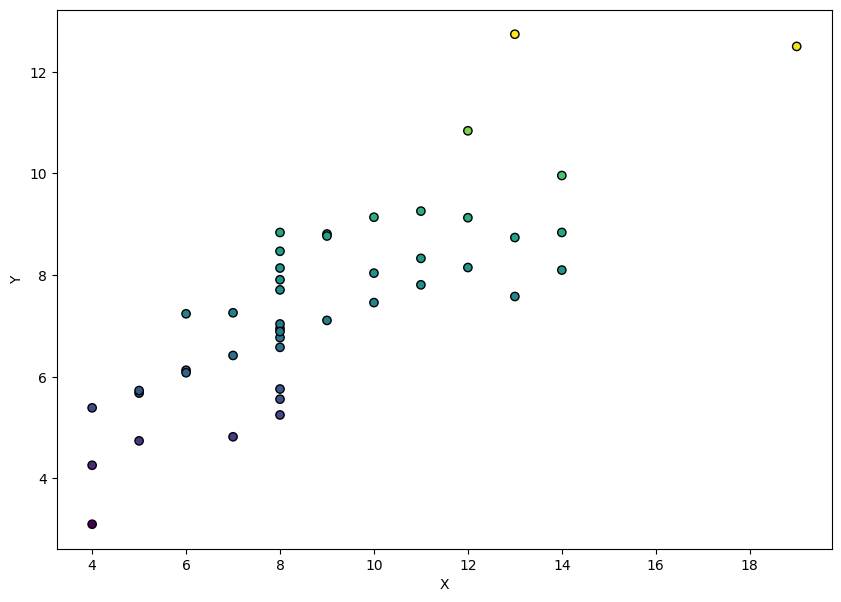

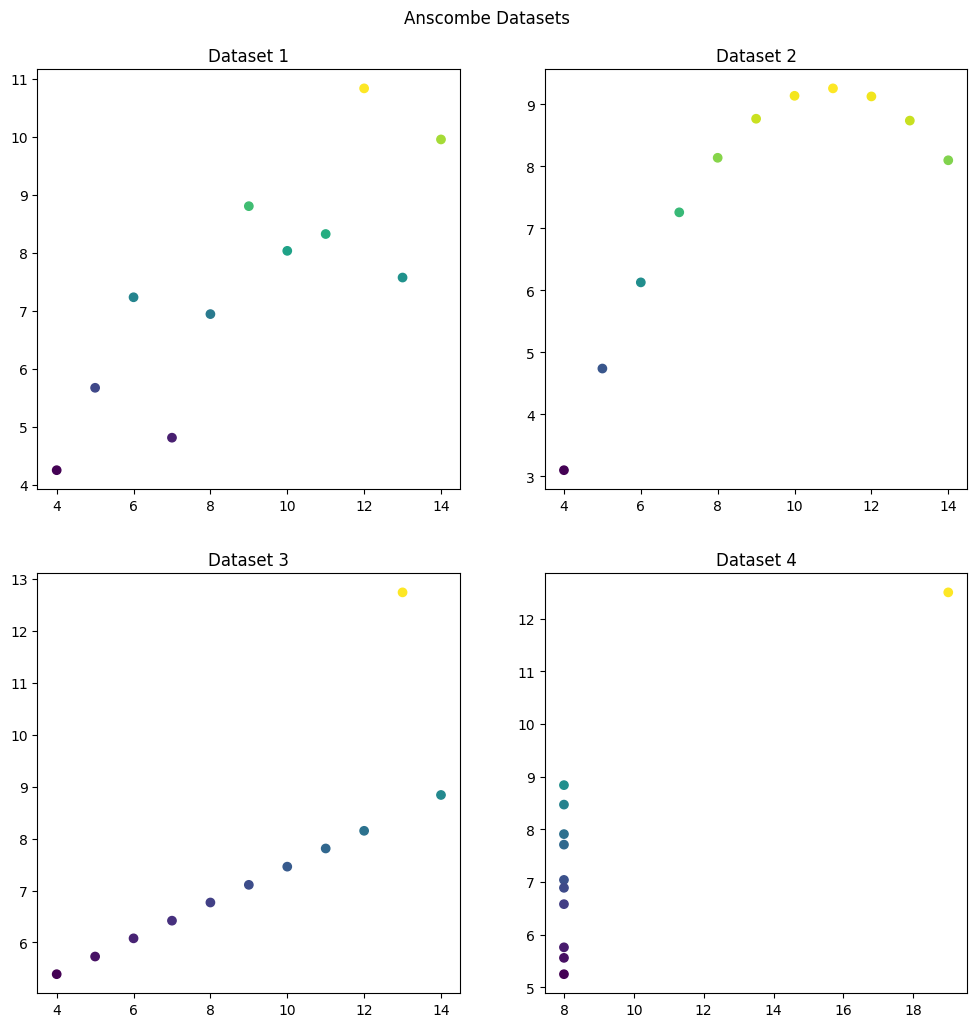

In [9]:
# VISUALISATION OF ALL DATASETS

# Visualising All datasets at once
val = df_anscombe.values
val[:, 1], val[:, 2]
plt.scatter(val[:, 1], val[:, 2], c=val[:, 2], cmap='viridis', edgecolor='k')
plt.xlabel("X")
plt.ylabel("Y")

# Defining individual variables
X1 = dataSet1.values[:,1]
y1 = dataSet1.values[:,2]
X2 = dataSet2.values[:,1]
y2 = dataSet2.values[:,2]
X3 = dataSet3.values[:,1]
y3 = dataSet3.values[:,2]
X4 = dataSet4.values[:,1]
y4 = dataSet4.values[:,2]

# Visualising All Datasets individually
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Dataset1
axs[0, 0].scatter( X1, y1, c=y1)
axs[0, 0].set_title("Dataset 1")

# Dataset2
axs[0, 1].scatter( X2, y2, c=val[11:22, 2])
axs[0, 1].set_title("Dataset 2")

# Dataset3
axs[1, 0].scatter(X3, y3, c=val[22:33, 2])
axs[1, 0].set_title("Dataset 3")

# Dataset4
axs[1, 1].scatter(X4, y4, c=val[33:44, 2])
axs[1, 1].set_title("Dataset 4")

plt.suptitle("Anscombe Datasets").set_y(0.93)
plt.show()

In [10]:
# DATASET 1
# For Dataset1 
print(f'the X and Y mean of the first dataset : Xmean= {X1.mean()} and Ymean= {y1.mean()}')
print(f'the X and Y variance of the first dataset : Xvar= {X1.var()} and Yvar= {y1.var()}')
print(f'the Correlation Coefficient of the first dataset : {dataSet1.corr(numeric_only= True)}')

# Calculate the slope and intercept of the linear regression line
slope1, intercept1, r_value, p_value, std_err = linregress(dataSet1['x'], dataSet1['y'])

# Print the equation of the linear regression line
print(f"y = {slope1:.6f}x + {intercept1:.6f}")

# Linear Regression
lr = LinearRegression()
lr.fit(X1.reshape(-1, 1), y1)

# Prediction
y1_pr = lr.predict(X1.reshape(-1, 1))

# Calculating ESS
ess1 = np.sum(np.square(y1_pr - y1.mean())**2)
print(f"Explained Sum of Square = {ess1}")

the X and Y mean of the first dataset : Xmean= 9.0 and Ymean= 7.500909090909093
the X and Y variance of the first dataset : Xvar= 10.0 and Yvar= 3.7520628099173554
the Correlation Coefficient of the first dataset :           x         y
x  1.000000  0.816421
y  0.816421  1.000000
y = 0.500091x + 3.000091
Explained Sum of Square = 122.46402427566966


In [254]:
# DATASET 2
# For Dataset 
print(f'the X and Y mean of the second dataset : Xmean= {X2.mean()} and Ymean= {y2.mean()}')
print(f'the X and Y variance of the second dataset : Xvar= {X2.var()} and Yvar= {y2.var()}')
print(f'the Correlation Coefficient of the second dataset : {dataSet2.corr(numeric_only= True)}')

# Calculate the slope and intercept of the linear regression line
slope2, intercept2, r_value, p_value, std_err = linregress(dataSet2['x'], dataSet2['y'])

# Print the equation of the linear regression line
print(f"y = {slope2:.6f}x + {intercept2:.6f}")

# Linear Regression
lr.fit(X2.reshape(-1, 1), y2)

# Prediction
y2_pr = lr.predict(X2.reshape(-1, 1))

#calculating ESS
ess2 = np.sum(np.square(y2_pr - y2.mean())**2)
print(f"Explained Sum of Square = {ess2}")

the X and Y mean of the second dataset : Xmean= 9.0 and Ymean= 7.500909090909091
the X and Y variance of the second dataset : Xvar= 10.0 and Yvar= 3.7523900826446277
the Correlation Coefficient of the second dataset :           x         y
x  1.000000  0.816237
y  0.816237  1.000000
y = 0.500000x + 3.000909
Explained Sum of Square = 122.375


In [255]:
# DATASET 3
# For Dataset1 
print(f'the X and Y mean of the third dataset : Xmean= {X3.mean()} and Ymean= {y3.mean()}')
print(f'the X and Y variance of the third dataset : Xvar= {X3.var()} and Yvar= {y3.var()}')
print(f'the Correlation Coefficient of the third dataset : {dataSet3.corr(numeric_only= True)}')

# Calculate the slope and intercept of the linear regression line
slope3, intercept3, r_value, p_value, std_err = linregress(dataSet3['x'], dataSet3['y'])

# Print the equation of the linear regression line
print(f"y = {slope3:.6f}x + {intercept3:.6f}")

# Linear Regression
lr.fit(X3.reshape(-1, 1), y3)

# Prediction
y3_pr = lr.predict(X3.reshape(-1, 1))

#calculating ESS
ess3 = np.sum(np.square(y3_pr - y3.mean())**2)
print(f"Explained Sum of Square = {ess3}")

the X and Y mean of the third dataset : Xmean= 9.0 and Ymean= 7.500000000000001
the X and Y variance of the third dataset : Xvar= 10.0 and Yvar= 3.747836363636364
the Correlation Coefficient of the third dataset :           x         y
x  1.000000  0.816287
y  0.816287  1.000000
y = 0.499727x + 3.002455
Explained Sum of Square = 122.10821837511838


In [256]:
# DATASET 4
# For Dataset4 
print(f'the X and Y mean of the forth dataset : Xmean= {X4.mean()} and Ymean= {y4.mean()}')
print(f'the X and Y variance of the forth dataset : Xvar= {X4.var()} and Yvar= {y4.var()}')
print(f'the Correlation Coefficient of the forth dataset : {dataSet4.corr(numeric_only= True)}')

# Calculate the slope and intercept of the linear regression line
slope4, intercept4, r_value, p_value, std_err = linregress(dataSet4['x'], dataSet4['y'])

# Print the equation of the linear regression line
print(f"y = {slope4:.6f}x + {intercept4:.6f}")

# Linear Regression
lr.fit(X4.reshape(-1, 1), y4)

# Prediction
y4_pr = lr.predict(X4.reshape(-1, 1))
#calculating ESS
ess4 = np.sum(np.square(y4_pr - y4.mean())**2)
print(f"Explained Sum of Square = {ess3}")

the X and Y mean of the forth dataset : Xmean= 9.0 and Ymean= 7.50090909090909
the X and Y variance of the forth dataset : Xvar= 10.0 and Yvar= 3.74840826446281
the Correlation Coefficient of the forth dataset :           x         y
x  1.000000  0.816521
y  0.816521  1.000000
y = 0.499909x + 3.001727
Explained Sum of Square = 122.10821837511838


### Q2 (2pts)

Vu la visualisation faite à la question précédente, que dire des statistiques calculées elles aussi à la question précédente ? (2pts)

`Answer: `
Regarding these Datasets, it is worth noting that despite the significant differences in the data points between the four datasets, the calculated statistical metrics such as the `mean, variance, and correlation coefficient `are remarkably `similar`. This implies that the four datasets are `statistically equivalent `and may provide a challenge when trying to differentiate between them based on summary statistics alone. Therefore, it is `important `to examine the `visual representation `of the data using techniques such as `scatter plots `to gain a better understanding of the underlying structure of the data.

### Q3 (4 pts)

Proposez de meilleures estimations (si possible) pour chacun des datasets. Justifiez (4 pts)

`Dataset 1: `for this dataset `Linear Regression `seemed to be the best option as an estimator regarding on how data is scattered

Text(0.5, 1.0, 'Linear Regression on Dataset 1')

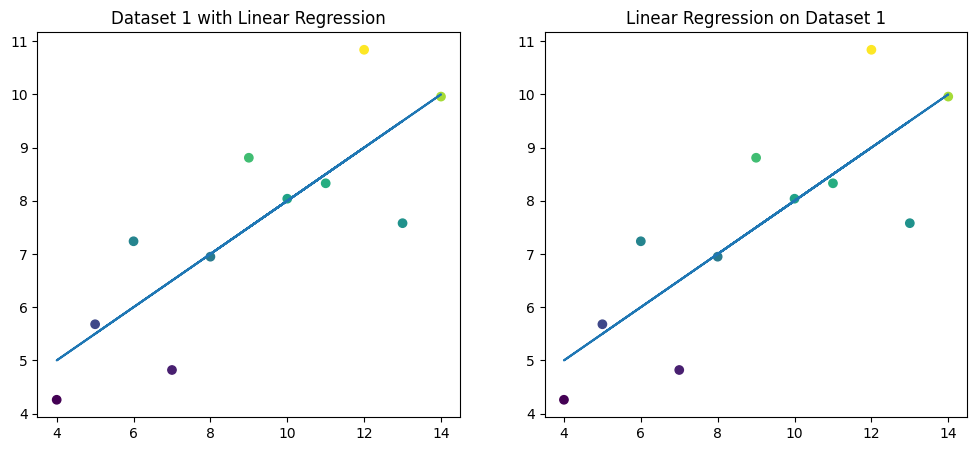

In [257]:
# Ploting both figures and visualising the prediction
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].scatter(X1, y1, c=y1)
axs[0].plot(X1, y1_pr)
axs[0].set_title("Dataset 1 with Linear Regression")

axs[1].scatter(X1, y1, c=y1)
axs[1].plot(X1, y1_pr)
axs[1].set_title("Linear Regression on Dataset 1")

`Dataset 2: `for this dataset `Polynomial Regression `seemed to be the `best option `as an estimator because it can follow the curve taked by the data points compared to Linear Regression which wasn't a good model estimator for this Dataset.

Text(0.5, 1.0, 'Polynomial Linear Regression on Dataset 2')

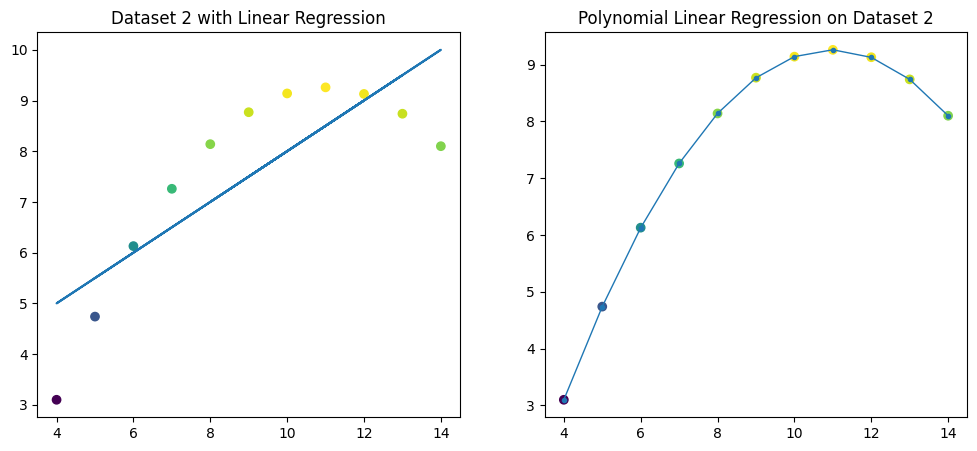

In [258]:
# Polynomial as a better model
poly=PolynomialFeatures(degree=2,include_bias=False);

#trier le tableau suivant la colonne X
dataSet_2 = dataSet2.sort_values('x', )

# Redefining the values of the sorted Dataset 
X_2 = poly.fit_transform(dataSet_2.values[:,1].reshape(-1,1))
y_2 = dataSet_2.values[:,2]

poly_lr = LinearRegression()
poly_lr.fit(X_2 , y_2)

# Prediction the Y with the polynomial model
y_2_pr =poly_lr.predict(X_2) 

# Ploting both figures and visualising the prediction
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].scatter(X2, y2, c=y2)
axs[0].plot(X2, y2_pr)
axs[0].set_title("Dataset 2 with Linear Regression")

axs[1].scatter(X2, y2, c=y2)
axs[1].plot(dataSet_2.values[:,1], y_2_pr , linewidth=1, label='Linear regressor',marker=".")
axs[1].set_title("Polynomial Linear Regression on Dataset 2")


`Dataset 3: `for this dataset `RANSAC Regression `seemed to be the best option as an estimator for it can ignore the `isolated data point `which maybe caused by the `disfunction of the instruments `or some other `error`.

Text(0.5, 1.0, 'RANSAC on Dataset 3')

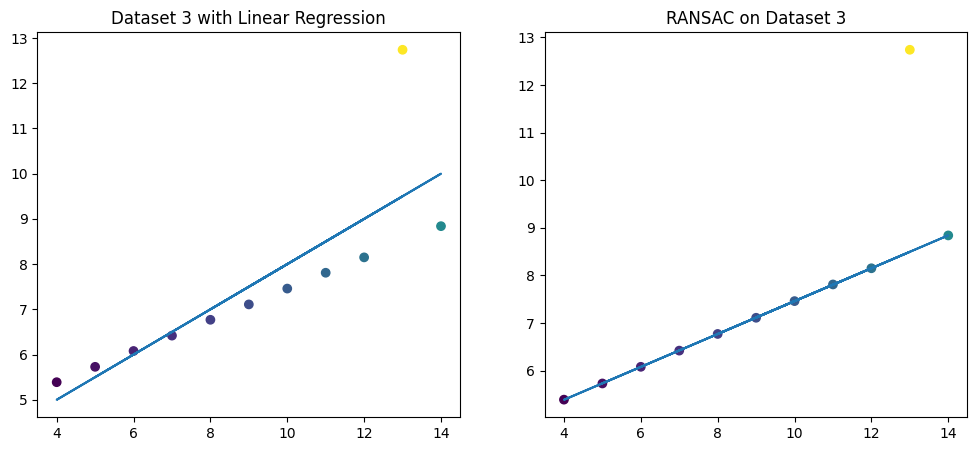

In [260]:
# Reshaping X3
X3_re = X3.reshape(-1, 1)

# RANSAC algorithm
ransac = RANSACRegressor()
ransac.fit(X3_re, y3)

# Using both models to predict Y values
y3_pr_lr = lr.predict(X3_re)
y3_pr_ransac = ransac.predict(X3_re)

# Ploting both figures and visualising the prediction
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].scatter(X3, y3, c=y3)
axs[0].plot(X3, y3_pr_lr)
axs[0].set_title("Dataset 3 with Linear Regression")

axs[1].scatter(X3, y3, c=y3)
axs[1].plot(X3, y3_pr_ransac)
axs[1].set_title("RANSAC on Dataset 3")

`Dataset 4: `for this dataset i haven't been able to give options for an estimator regarding on how data is scattered there is `no mathematical function `to define the allignment and these data seem be `unbiased`.

Text(0.5, 1.0, 'No better Estimator on Dataset')

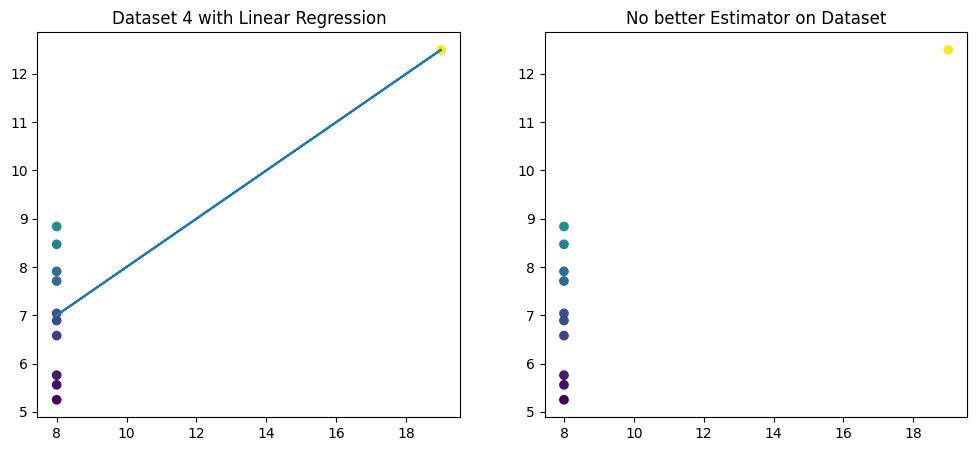

In [261]:
# Ploting both figures and visualising the prediction
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].scatter(X4, y4, c=y4)
axs[0].plot(X4, y4_pr)
axs[0].set_title("Dataset 4 with Linear Regression")

axs[1].scatter(X4, y4, c=y4)
axs[1].set_title("No better Estimator on Dataset")

* `Dataset 1: `Linear Regression was observed to be the best estimator `due to the linear relationship `between the dependent and independent variables, making it an ideal model for this type of data. The scattered data points were still able to be accurately predicted using this estimator.
* `Dataset 2: `Polynomial Regression was the preferred estimator `due to the non-linear relationship `between the dependent and independent variables. The curve taken by the data points was not suitable for a linear model estimator
* `Dataset 3: `RANSAC Regression was identified as the best estimator. This was due to its `ability to handle outliers effectively`, such as those that may have resulted from `instrument malfunctions `or other `errors`. RANSAC Regression ignores isolated data points and fits the remaining data points more robustly, making it a suitable estimator for this dataset.
* `Dataset 4: `no single `mathematical function `was able to accurately describe the alignment of the data points, and the data seemed to be unbiased. Therefore, a suitable estimator could not be identified for this dataset based on the scattered data. Other techniques, such as clustering or unsupervised learning methods, may be more appropriate for analyzing this type of data.

## Exercice - Classification (10 pts)

### Q1 (0 pts)
Récupérer les images à l’adresse https://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php et en particulier la version du dataset traitée (processed).

### Q2 (2pts)
Construire un conteneur avec les valeurs des 7 moments de Hu (calculées sur les éléments du dataset) ainsi que le numéro de classe (contenu dans les noms des fichiers).

*Indication :* des fonctions permettant d’ouvrir les images et calculer les 7 moments de Hu sont disponibles dans le paquet scikit-image.

In [318]:
# in case you want to directly get the images from the link
'''  
# Getting the images from web and unzipping 
! wget http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-20/coil-20-proc.zip
# tar -xzf /content/coil-20-proc.zip
! unzip /content/coil-20-proc.zip 
'''

'  \n# Getting the images from web and unzipping \n! wget http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-20/coil-20-proc.zip\n# tar -xzf /content/coil-20-proc.zip\n! unzip /content/coil-20-proc.zip \n'

In [302]:
# io.imread to read the images
images = io.imread_collection('coil-20-proc/*.png')

# Creating a container for the moments 
hu_moments = []

# Finding moments
for image in images: 
    mom_central = moments_central(image)
    mom_norm = moments_normalized(mom_central)
    hu_var = moments_hu(mom_norm)
    hu_moments.append(hu_var)

hu_moments_arr = np.asarray(hu_moments)

# Getting the Classes
classes = []
for filename in images.files:
    match = re.search(r"obj(\d+)", filename)
    classes.append(int(match.group(1)))

class_arr = np.asarray(classes)

# Showing the first 4 elements of each list
hu_moments[0:4], classes[0:4]


([array([ 1.00124048e-03,  1.23443251e-07,  1.94804262e-10,  1.58289970e-11,
         -8.71670774e-22, -5.32080964e-15, -1.13124157e-22]),
  array([ 1.00025421e-03,  1.23834901e-07,  1.82278479e-10,  1.56924029e-11,
         -8.38637686e-22, -5.45482536e-15,  3.25811819e-23]),
  array([ 9.84617986e-04,  1.30170562e-07,  1.84702996e-10,  1.42248436e-11,
         -7.18247528e-22, -5.12929861e-15,  1.25534884e-22]),
  array([ 9.78007104e-04,  1.31238711e-07,  1.81275393e-10,  1.38400584e-11,
         -6.56697079e-22, -4.98579408e-15,  2.22068641e-22])],
 [1, 1, 1, 1])

### Q3 (2pts)

Entraîner un classificateur SVM noyau RBF (avec les paramètres par défaut) sur le conteneur défini précédemment. Interpréter les résultats obtenus.

*Indication :* Vous pourrez utiliser l’implémentation des SVM de scikit-learn.

In [303]:
# Defining the data to train on
X_train, X_test, y_train, y_test = train_test_split(hu_moments, classes, test_size=0.2, random_state=0)

# SVM Model with rbf Kernel 
clf = SVC(kernel='rbf', C= 0.1, gamma=0.001) # modified after finding the optimised values
clf.fit(X_train, y_train)
clf.fit(hu_moments, classes)

# Making Predictions
y_pred = clf.predict(X_test)
y_pred_all = clf.predict(hu_moments)

# Evaluating the Model Using Classification Report
print(classification_report(classes,y_pred_all,zero_division=1))


              precision    recall  f1-score   support

           1       0.41      0.57      0.48        72
           2       1.00      0.00      0.00        72
           3       1.00      0.00      0.00        72
           4       1.00      0.00      0.00        72
           5       1.00      0.00      0.00        72
           6       1.00      0.00      0.00        72
           7       1.00      0.00      0.00        72
           8       0.23      0.54      0.33        72
           9       0.28      0.28      0.28        72
          10       1.00      0.00      0.00        72
          11       1.00      0.00      0.00        72
          12       0.27      0.99      0.42        72
          13       1.00      0.38      0.55        72
          14       1.00      0.00      0.00        72
          15       0.37      0.90      0.52        72
          16       0.34      0.89      0.49        72
          17       0.43      0.56      0.49        72
          18       0.34    

`Remark: `After generating a `classification_report`, it was observed that the model's accuracy was only `35%` when using the `SVM kernel rbf`. However, by examining the `f1-score `and `recall `metrics, we can gain more insight into the model's performance. The f1-score is a `weighted harmonic mean `of the precision and recall, providing a `more balanced measure `of the model's overall performance. The recall metric, also known as `sensitivity or true positive rate`, indicates the proportion of actual positive cases that were correctly identified by the model.

### Q4 (3 pts)
Réaliser une recherche des paramètres optimaux (C et $\gamma$ (gamma)) pour le noyau RBF à l’aide du GridSearch.

In [304]:
# SVM with RBF kernel 
svm = SVC(kernel='rbf')

# Defining the parameters of C and gamma
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Conducting a test with the GridSearch
grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, y_train)

# Getting the best parameters
print("Best parameters: ", grid.best_params_)

Best parameters:  {'C': 10000, 'gamma': 10000}


### Q5 (3pts)

Analyser et conclure à partir des résultats obtenus.

In [305]:
# Standardize
std = StandardScaler().fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

# Fit Standardized data to the SVM 
svm.fit(X_train_std, y_train)

# Calculating the score
accuracy = svm.score(X_test_std, y_test)
print("précision score :", accuracy)

précision score : 0.7048611111111112


`First` Standardizing the data resulted in an improved `score`. This is because standardization can help prevent any one feature from dominating the others due to differences in scale. By transforming the data to have a mean of zero and a standard deviation of one, the model's ability to accurately capture patterns in the data and make reliable predictions was enhanced.

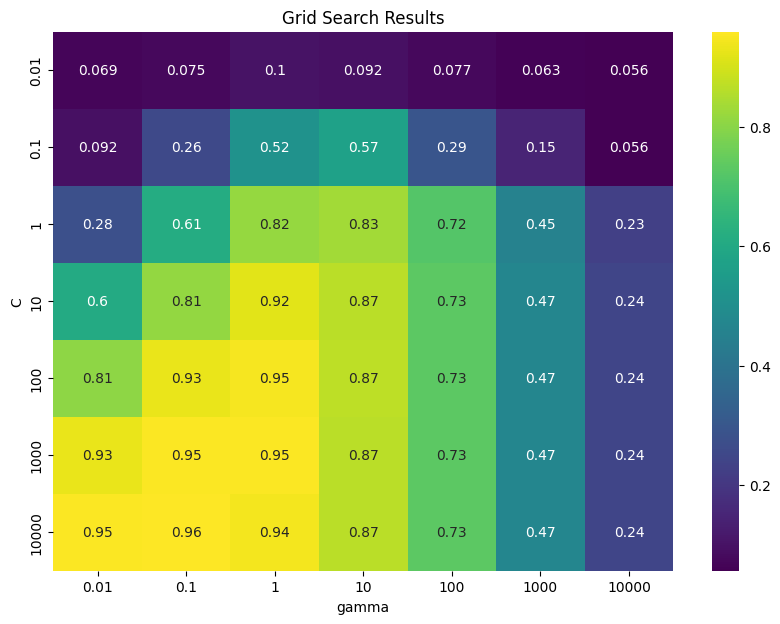

Score of GridSearch on standardized model : 0.9722222222222222
Best parameters on standardized model:  {'C': 10000, 'gamma': 0.1}


In [265]:
# Grid parameterd Testing sample
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Refinning Grid model estimator
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=5)

# Training the model
grid.fit(X_train_std, y_train)

# Gather the result samples from training sessions as a dictionary
results = grid.cv_results_

# Turn results into a pandas Dataframe
df = pd.DataFrame.from_dict(results)

# Creating an array for the scores of each parameter to another
scores = np.array(df.mean_test_score).reshape(len(param_grid['C']), len(param_grid['gamma']))

# Visualisation of the results
sns.heatmap(scores, cmap='viridis', annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])

plt.xlabel('gamma')
plt.ylabel('C')
plt.title('Grid Search Results')
plt.show()

# The Score of the model
accuracy = grid.score(X_test_std, y_test)
print("Score of GridSearch on standardized model :", accuracy)
# Getting the best parameters on standardized model
print("Best parameters on standardized model: ", grid.best_params_)

`Remark` The model evaluation results indicate that the combination of `C=10000 `and `gamma=0.1 `achieved a nearly `perfect score of 97%`. The heatmap visualization of the performance across `different parameter values `in the `param_grid `dictionary provides a `more comprehensive view `of the model's performance. The heatmap illustrates the distribution of different scores obtained by evaluating the model with various combinations of hyperparameters.

## Problème - Le Titanic (27 pts)

In [11]:
df_titanic = sns.load_dataset("titanic")
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Q1 - 2pts
* Quelles sont les colonnes liées à des données numériques et les colonnes liées à des données catégorielles ? (2pts)

*Indication:* vérifiez bien le contenu des colonnes avant de répondre.

In [12]:
values = df_titanic.values
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


We have :</br>
* Columns with numerical data

`PassengerId` : Unique Passenger identifier.</br>
`Survived `: indicated the survival state of passengers (0 = No, 1 = Yes).</br>
`Pclass `: Ticket Classes (1 = 1sr class, 2 = 2nd class, 3 = 3rd class).</br>
`Age `: age of passengers (years).</br>
`SibSp `: number of siblings on board.</br>
`Parch` : number of parents/children on board.</br>
`Fare` : Ticket price.</br>

* Columns with non-numerical datas (categories) :

`Name` : name of the passager. </br>
`Sex` : sex of the passager (male or female).</br>
`Ticket` : Ticket number.</br>
`Cabin `: Cabin number.</br>
`Embarked` : Embarked Port (C = Cherbourg, Q = Queenstown, S = Southampton)</br>

### Q2 - 7 pts

Extraire les valeurs suivantes et proposer une visualisation pour:
* Le genre des passagers (1pt)
* Le genre des passagers suivant la classe de voyage (1 pt)
* En supposant qu'un passager est un enfant si il a moins de 16 ans, combien y a t il d'enfants et quelle est la moyenne d'age des passagers ? Interprétation ? (2pts +1pt)
* Histogramme des ages suivant le genre (2 pts)

Gender of the passengers
Gender of the passengers according to Classes they belong to


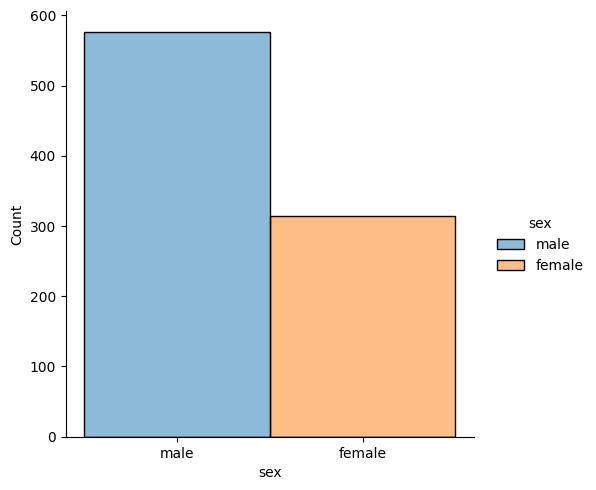

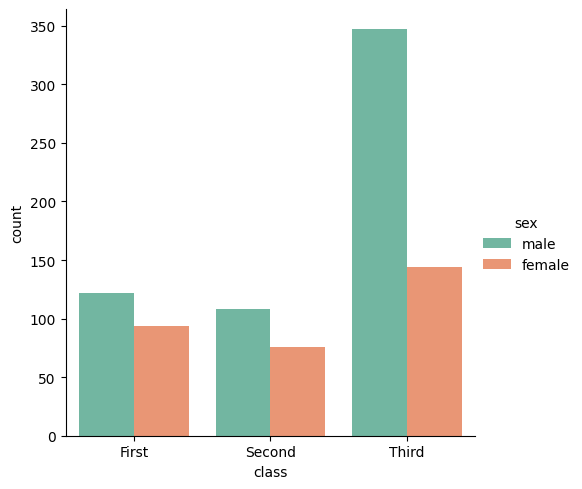

In [13]:
sex = values[:, 2]
classes = values[:, 1]
print('Gender of the passengers')
sns.displot(df_titanic, x='sex',hue='sex')
print('Gender of the passengers according to Classes they belong to')
sns.catplot(x='class', hue='sex', kind='count', data=df_titanic, palette='Set2')

`Remark `Women are almost equally distributed among all classes but men in the `3rd Class` were denser compared to oother classes

In [14]:
kids = []
rAge = []
for age in values[:,3]:
    if age < 16:
        kids.append(age)
    elif age < 100:  # to find the mean of known age
        rAge.append(age)   
print(f'there are {len(kids)} kids and the mean age of passengers is {np.mean(rAge)} years')

there are 83 kids and the mean age of passengers is 32.76782884310618 years


Age and Sex histogram


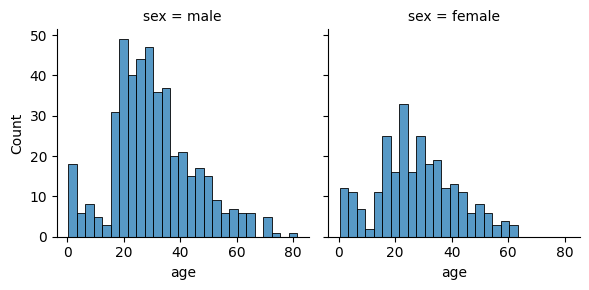

In [15]:
print('Age and Sex histogram')
sns.displot(df_titanic, x="age", col="sex", binwidth=3, height = 3, facet_kws=dict(margin_titles=True))

`Remark `there were on average many (20-40)yrs men than women 

### Q3 (3pts)

Le Titanic possedait 7 ponts dévoués aux passagers, notés de A à G. A partir de la colonne "Cabin", présenter la distribution des passagers suivants leur pont. (3pts)

*Indication:* toutes les données ne sont pas bonnes ! Il faudra faire attention !

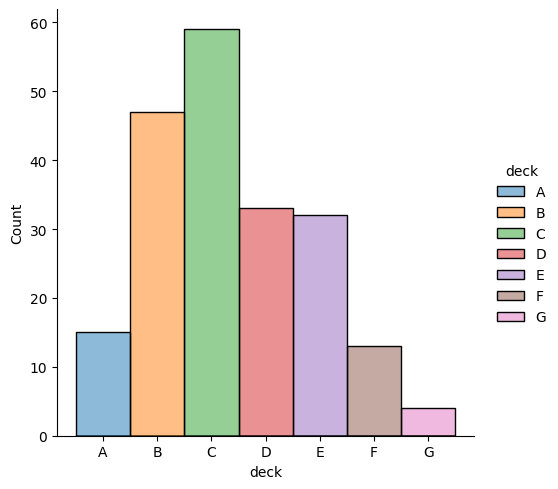

In [16]:
# Displaying the districbution of passengers to the port they took
sns.displot(df_titanic, x='deck',hue='deck')

`Deck C `boarded a lot of passenger where `Deck G `boarded few 

### Q4 (3 pts)

Les trois villes d'embarquement étaient Cherbourg, Queenstown et Southhampton.

Montrer la répartion par classe suivant la ville de départ. Conclusion ?

['Southampton' 'Cherbourg' 'Queenstown' nan]


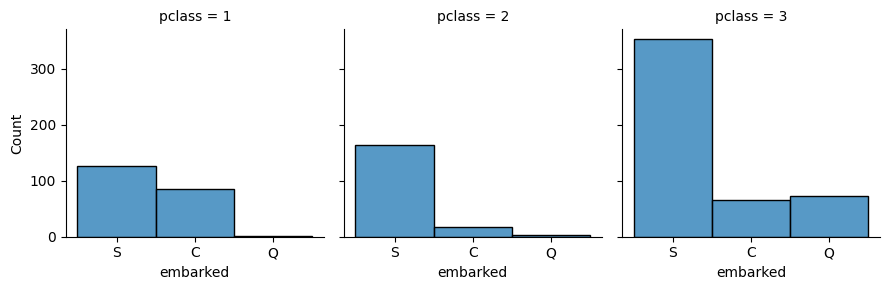

In [327]:
print(df_titanic.embark_town.unique())
sns.displot(df_titanic, x="embarked", col="pclass", binwidth=3, height = 3, facet_kws=dict(margin_titles=True))

`Conclusion: `people from `Queenstown `for example were mainly in the 3rd Class and also the 2nd class was almost only occupied by `Southampton `people. And also as seen above more than a half of passengers were from `Southampton `and in this case they dominated the 3rd and 2nd class

### Q5 (12 pts)
**ATTENTION**: cette question est volontairement ouverte. Vous êtes libres de la manière de résoudre le problème posé.

On veut savoir quels sont les facteurs qui favorisent la probabilité de survivre au naufrage du Titanic.

Vous pourrez mélanger parties de code et commentaires en Markdown pour rendre votre réponse interactive.

On s'attend à trouver :
* des visualisations pertinentes
* des choix d'estimateurs pertinents
* des interprétations des visualisations et résultats des estimateurs.

<AxesSubplot: >

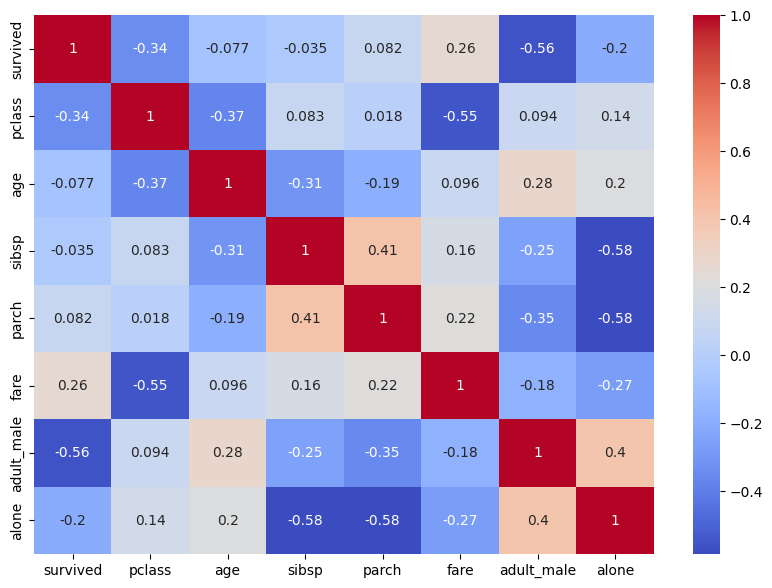

In [17]:
sns.heatmap(df_titanic.corr(numeric_only= True), annot=True, cmap='coolwarm')

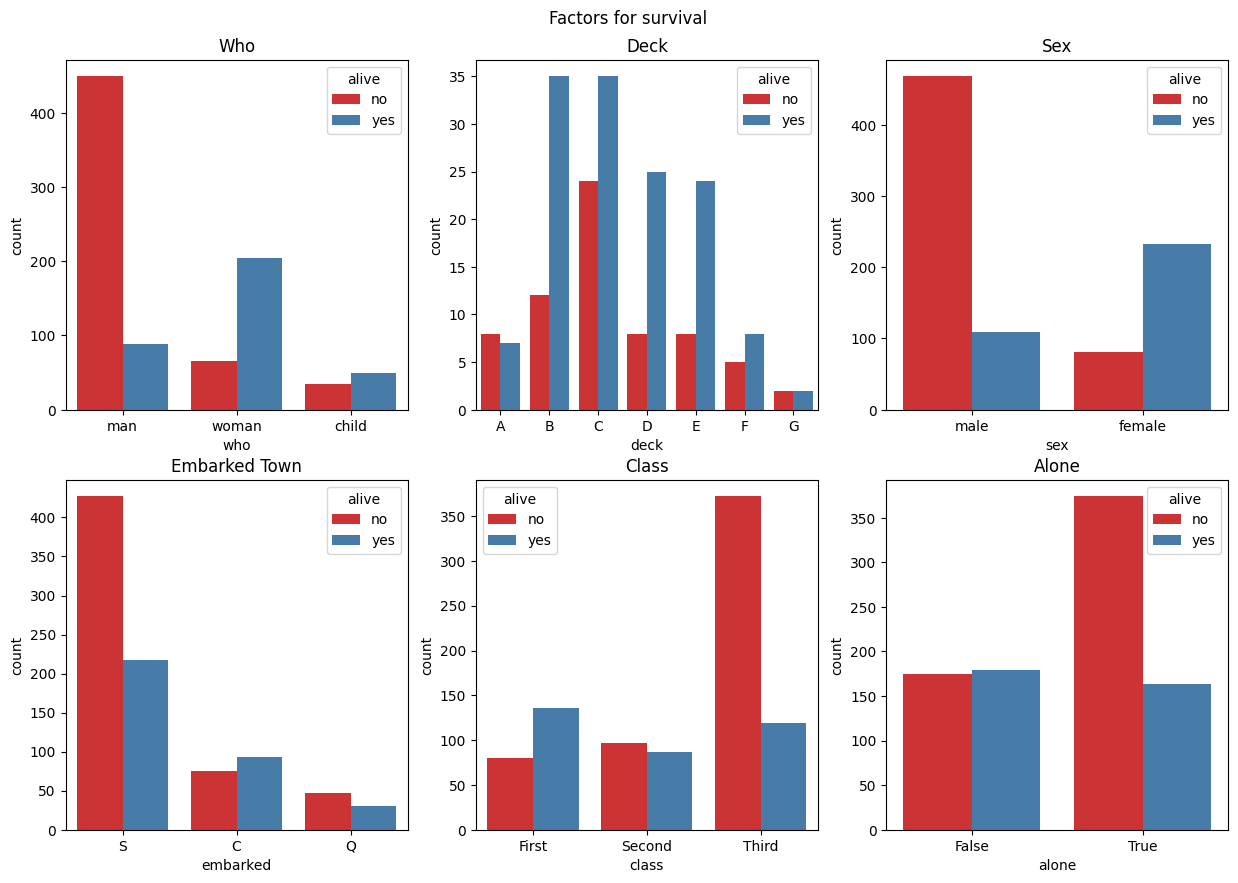

In [334]:
# Visualisation of the Survival among different aspects
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Who
sns.countplot(x='who', hue='alive', data=df_titanic, palette='Set1', ax=axs[0, 0])
axs[0, 0].set_title("Who")

# Deck
sns.countplot(x='deck', hue='alive', data=df_titanic, palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title("Deck")

# sex
sns.countplot(x='sex', hue='alive', data=df_titanic, palette='Set1', ax=axs[0, 2])
axs[0, 2].set_title("Sex")

# Embarked_town
sns.countplot(x='embarked', hue='alive', data=df_titanic, palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title("Embarked Town")

# Class
sns.countplot(x='class', hue='alive', data=df_titanic, palette='Set1', ax=axs[1, 1])
axs[1, 1].set_title("Class")

# age
sns.countplot(x='alone', hue='alive', data=df_titanic, palette='Set1', ax=axs[1, 2])
axs[1, 2].set_title("Alone")

plt.suptitle("Factors for survival").set_y(0.93)
plt.show()


`Remark:`
* Based on the above visualizations, we can see that around `80% `of male passengers `did not survive `the Titanic tragedy, whereas more than `65% `of female passengers `survived`. This suggests that `there was a gender bias` in the survival rate, and `women were given priority` over men during the `evacuation `process.
* Children, as evident from the data, had a `small representation `in the dataset, and `most of them survived `the tragedy. This might be due to the fact that they were given `priority `during the evacuation process.
* From the deck-wise analysis, we can see that `Deck B `had a very `low death-rate`, whereas `Deck A `had a `higher death-rate `than survival-rate. This could be because Deck B was located at a higher position and was `relatively closer `to the lifeboats.
* Among the embarkment points, passengers from `Cherbourg `managed to `survive more than others `on average, even though they were fewer in number. This could be attributed to the fact that `they were mainly first-class passengers `and had `access to better evacuation facilities`.
* `Third-class `passengers had a `significantly higher death-rate `compared to `first-class `passengers, indicating that `socio-economic status `played a crucial role in the `survival rate`.
* Passengers who were `alone `had a `higher death-rate `compared to those who were `traveling with family members`. This could be due to the fact that `families` had `better support `during the `evacuation proces`s, whereas individuals had `to fend for themselves`. 

In [336]:
# One-hot encode the "who" variable
who_onehot = pd.get_dummies(df_titanic['who'], prefix='who')
df_titanic = pd.concat([df_titanic, who_onehot], axis=1)

# One-hot encode the "Embarked" variable
embarked_onehot = pd.get_dummies(df_titanic['embarked'], prefix='embarked')
df_titanic = pd.concat([df_titanic, embarked_onehot], axis=1)

# One-hot encode the "deck" variable
deck_onehot = pd.get_dummies(df_titanic['deck'], prefix='deck')
df_titanic = pd.concat([df_titanic, deck_onehot], axis=1)

# One-hot encode the "age" variable
age_onehot = pd.get_dummies(df_titanic['age'], prefix='age')
df_titanic = pd.concat([df_titanic, age_onehot], axis=1)

# One-hot encode the "Sex" variable
sex_onehot = pd.get_dummies(df_titanic['sex'], prefix='sex')
df_titanic = pd.concat([df_titanic, sex_onehot], axis=1)

df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,age_64.0,age_65.0,age_66.0,age_70.0,age_70.5,age_71.0,age_74.0,age_80.0,sex_female,sex_male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,0,0,0,0,0,0,0,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,0,0,0,0,0,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,0,0,0,0,0,0,0,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,0,0,0,0,0,0,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,0,0,0,0,0,0,0,0,0,1


The dataset was preprocessed using the `get_dummies `method to transform `non-numerical `data to `numerical `data, which also handled missing values represented as `NaN`. This ensured that the data was in a suitable format for further analysis.

In [337]:
# Defining the X and y and cleaning the dataset
inputs_dum = df_titanic.drop(['survived','sibsp','parch','adult_male','embark_town','alive','class','who','embarked','deck','age','sex'], axis='columns')
surv = df_titanic['survived']
inputs_dum.shape, surv.shape

((891, 106), (891,))

In [339]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_dum, surv, test_size=0.2, random_state=0)
# linear Regression
lr.fit(X_train,y_train)
print(f'The Score of the linear Regression is ', lr.score(X_test, y_test))
# Logistic Regression
logs = LogisticRegression(max_iter= len(surv))
logs.fit(inputs_dum, surv)
print(f'The Score of the logistic Regression is ', logs.score(X_test, y_test))

The Score of the linear Regression is  -1.653696934491394e+18
The Score of the logistic Regression is  0.8435754189944135


`Remark: ` as the first trial i tried Linear Regressor as my estimator choice but it wasn't any  close to performing any good with the Titanic daraset
then i turned to Logistic Regressor and it was able to perform better with a score of 84%.

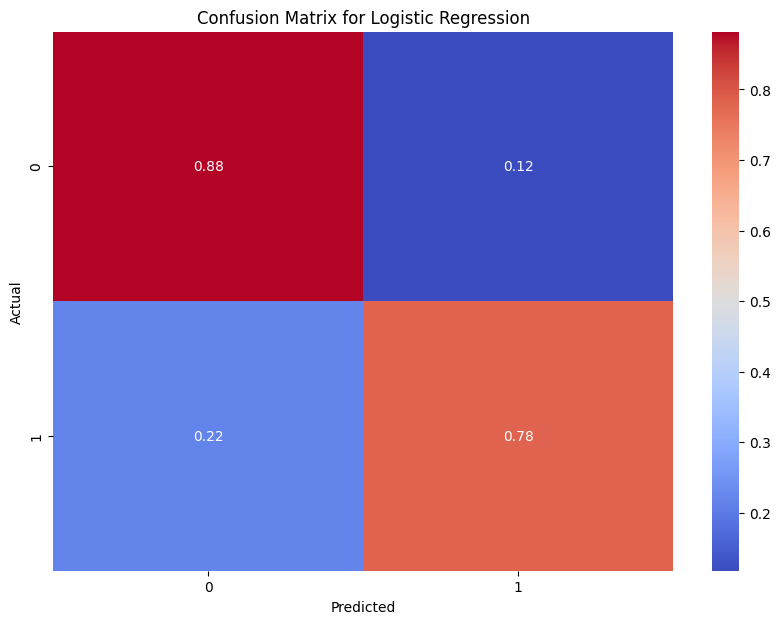

In [340]:
y_pred = logs.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

sns.heatmap(conf_matrix, annot=True, cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

`Remark: ` Based on the confusion matrix, we can observe that the estimator correctly predicted 78% of the actual dead as dead and 88% of the actual alive as alive. However, it misclassified 22% of the actual dead as alive and 12% of the actual alive as dead, indicating room for improvement in the model's performance.

In [342]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)
inputs_pca = pca.fit_transform(inputs_dum)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_pca, surv, test_size=0.2, random_state=0)

# Logistic Regression
logs = LogisticRegression(max_iter= len(surv))
logs.fit(X_train, y_train)

print(f'The Score of the logistic Regression with PCA is ', logs.score(X_test, y_test))


The Score of the logistic Regression with PCA is  0.7932960893854749


In [344]:
# Create an LDA object and fit it to the data
lda = LinearDiscriminantAnalysis()
lda.fit(inputs_dum, surv)

# Transform the data using the LDA model
inputs_lda = lda.transform(inputs_dum)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_lda, surv, test_size=0.2, random_state=0)

# Fit a logistic regression model to the transformed data
logs = LogisticRegression(max_iter=len(surv))
logs.fit(X_train, y_train)

# Calculate the score of the logistic regression model on the testing data
print(f'The score of the logistic regression model with LDA is {logs.score(X_test, y_test)}')


The score of the logistic regression model with LDA is 0.8268156424581006


`Remark` the attempt to use `PCA `and `LDA `have failed because When creating dummy variables from categorical features, some information is lost in the process. For example, the order of the categories is lost. This lost information is important for predicting the target variable, then it may be difficult for PCA or LDA to capture it.

Accuracy: 81.01%


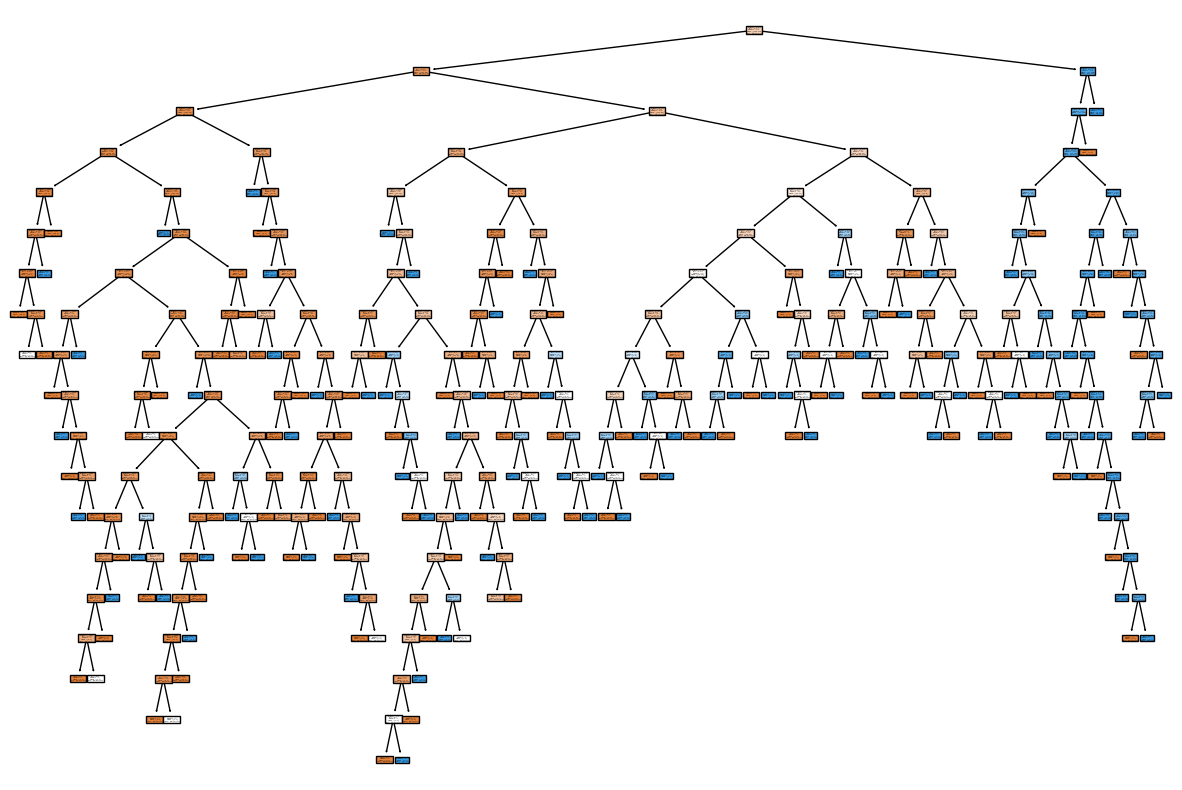

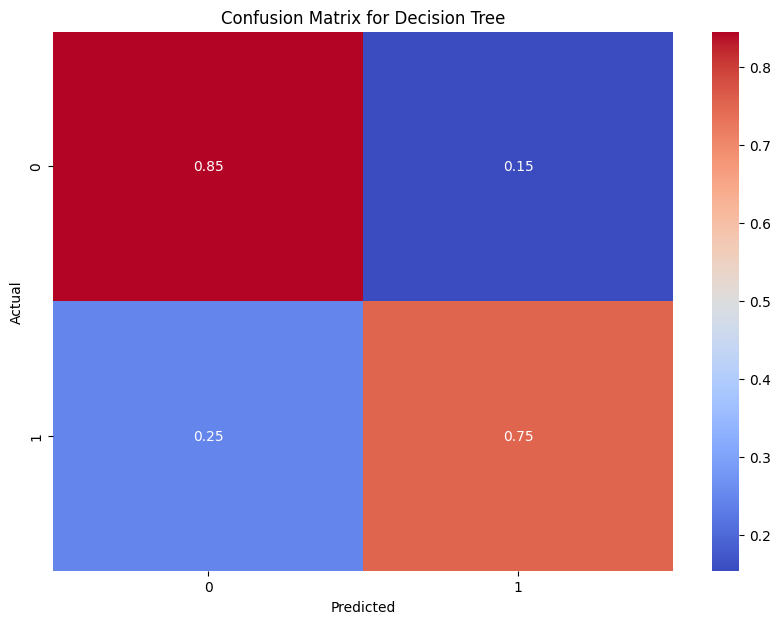

In [347]:

# Create and fit the decision tree classifier
tree_Tit = tree.DecisionTreeClassifier()
clf = tree_Tit.fit(inputs_dum, surv)

# Making a test and train sample
clf1 = tree_Tit.fit(X_train,y_train)

# Calculate the score on the testing data
score = clf1.score(X_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))

# Visualize the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names=inputs_dum.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Confusion matrix of the Decision tree
y_pred_tree = clf1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_tree, normalize='true')

sns.heatmap(conf_matrix, annot=True, cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

In [ ]:
# The best method of Decision tree visualisation 

dot_data = export_graphviz(clf, out_file=None, filled=True, rounded=True, class_names=['Not Survived', 'Survived'])
graph = graphviz.Source(dot_data)
graph

`Remark: ` <br> 
* x[3] <= 0.5
* gini = 0.473
* samples = 891
* value = [549, 342]
* class = Not Survived <br>
this is the content of one small node as shown briefly by `matplotlib `but `graphviz `gives the actual details on `parameters considered `and the conlusion made `gini `. unfortunately it wasn't working on my Kernel so i used matplotlib for the global view of the whole tree

`CONCLUSION: `It is also worth noting that the `logistic regression `model is a parametric model that assumes a linear relationship between the independent and dependent variables, while the `decision tree model `is a non-parametric model that does not make any such assumptions. Additionally, the decision tree model may be `more prone to overfitting` compared to the logistic regression model, which can lead to poorer performance on new and unseen data.

In [280]:
'''
# Encoding the non Numeric Data
Sex = LabelEncoder()
Age = LabelEncoder()
Embarked = LabelEncoder()
Deck = LabelEncoder()
Who = LabelEncoder() 

# Creating new numerical columns
inputs['sex_n'] = Sex.fit_transform(inputs['sex'])
inputs['age_n'] = Age.fit_transform(inputs['age'])
inputs['embarked_n'] = Embarked.fit_transform(inputs['embarked'])
inputs['deck_n'] = Deck.fit_transform(inputs['deck'])
inputs['who_n'] = Who.fit_transform(inputs['who'])

# Removing the non numerical columns 
input = inputs.drop(['sex','age','embarked','who','deck'], axis='columns')
input.head()
'''

"\n# Encoding the non Numeric Data\nSex = LabelEncoder()\nAge = LabelEncoder()\nEmbarked = LabelEncoder()\nDeck = LabelEncoder()\nWho = LabelEncoder() \n\n# Creating new numerical columns\ninputs['sex_n'] = Sex.fit_transform(inputs['sex'])\ninputs['age_n'] = Age.fit_transform(inputs['age'])\ninputs['embarked_n'] = Embarked.fit_transform(inputs['embarked'])\ninputs['deck_n'] = Deck.fit_transform(inputs['deck'])\ninputs['who_n'] = Who.fit_transform(inputs['who'])\n\n# Removing the non numerical columns \ninput = inputs.drop(['sex','age','embarked','who','deck'], axis='columns')\ninput.head()\n"

`Remark: `Using `LabelEncoder `instead of `get_dummies `resulted in `poor performance `of the model as LabelEncoder is not suitable for categorical variables with multiple levels. LabelEncoder only assigns a unique numerical value to each level of the categorical variable which does not provide any meaningful relationship between the levels. In contrast, get_dummies creates separate columns for each level of the categorical variable which allows the model to capture the relationship between the levels. Therefore, it is why i dropped the idea of using it.

## Problème - Conception de Features et classifications (20 pts)

Cet exercice est une grande question ouverte. Vous êtes libres de proposez vos solutions, sous réserve de justification.

Les tracés (ci-présent) devront être décrits et analysés.

Le code ci-après télécharge un sous-ensemble d'un dataset sur lequel vous travaillerez et montre un exemple basique de visualisation des données.

Le but est de créer un système capable de reconnaitre des hommes politiques.

Contenu du dataset:
n_samples: 1288
n_features: 11750
n_classes: 7


Text(0.5, 1.0, 'Tony Blair')

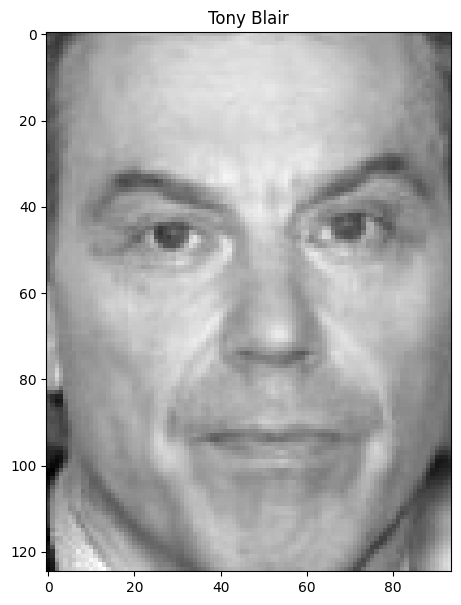

In [348]:
# DTéléchargement (long et pas d'indication de progression.)
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=None)

# Permet d'obtenir la taille des images
n_samples, h, w = lfw_people.images.shape

# version aplatie
X = lfw_people.data
n_features = X.shape[1]

# la variable à prédire est l'id de la personne
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Contenu du dataset:")
print(f"n_samples: {n_samples}")
print(f"n_features: {n_features}" )
print(f"n_classes: {n_classes}")

shown_id = np.random.randint(n_samples)
target = y[shown_id]

plt.imshow(X[shown_id].reshape((h,w)), cmap="gray")
plt.title(target_names[target])

In [349]:
print(f"images: {lfw_people.images.shape}")
print(f"target: {lfw_people.target.shape}" )
print(f"target_names: {lfw_people.target_names.shape}" )
print(f"data: {lfw_people.data.shape}")

# Changing it to a DataFrame for better visualisation

df = pd.DataFrame(data=lfw_people.data, columns=[f'pixel_{i}' for i in range(lfw_people.data.shape[1])])
df['target'] = lfw_people.target
df['target_names'] = lfw_people.target_names[df['target']]

df.head()

images: (1288, 125, 94)
target: (1288,)
target_names: (7,)
data: (1288, 11750)


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_11742,pixel_11743,pixel_11744,pixel_11745,pixel_11746,pixel_11747,pixel_11748,pixel_11749,target,target_names
0,0.994771,0.994771,0.998693,0.998693,0.992157,0.996078,0.984314,0.980392,0.988235,0.967320,...,0.384314,0.379085,0.380392,0.380392,0.385621,0.381699,0.380392,0.380392,5,Hugo Chavez
1,0.164706,0.133333,0.124183,0.163399,0.211765,0.205229,0.169935,0.126797,0.124183,0.183007,...,0.458824,0.441830,0.447059,0.458824,0.447059,0.477124,0.580392,0.726797,6,Tony Blair
2,0.368627,0.282353,0.290196,0.325490,0.377778,0.444444,0.461438,0.505882,0.526797,0.550327,...,0.713726,0.730719,0.701961,0.705882,0.712418,0.716340,0.717647,0.715033,3,George W Bush
3,0.028758,0.005229,0.022222,0.022222,0.020915,0.023529,0.031373,0.035294,0.028758,0.011765,...,0.113725,0.078431,0.084967,0.109804,0.159477,0.183007,0.190850,0.200000,1,Colin Powell
4,0.475817,0.464052,0.466667,0.462745,0.466667,0.483660,0.499346,0.505882,0.507190,0.507190,...,0.030065,0.061438,0.132026,0.207843,0.273203,0.305882,0.292810,0.261438,0,Ariel Sharon


`Explanations: `i chose to transform the dataset into a `pandas ` dataset coz it would be easier to manipulate and have a better visualisation of the information i had in the dataset. At first it was confusing but after making this approach it all became more clearer and i was able to proceed 

In [350]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8) # 0 for random and 10 for not changing

`Weird observation: ` i was testing my models and changing parameters but something dramatically changed when i chose a `random_state of 8 `i have my theories as for the number of targets is 7 maybe! but required more observatio to make that conclusion 

In [351]:
# Linear Regression

lr = linear_model.LinearRegression()
# Perform the Linear Regression train
lr.fit(X_train, y_train)
# Making the test
lr.predict(X_test)
# The efficiency
score_lr = lr.score(X_test, y_test) 

print('the efficiency of using the Linear Regression is: {:.2f}%'.format(score_lr * 100))

# Logistic Regression
log = LogisticRegression(solver='lbfgs', max_iter=n_features)
# Perform the Logistic Regression train
log.fit(X_train, y_train)
# Making the test
log.predict(X_test)
# The efficiency
score_log = log.score(X_test, y_test) 

print('the efficiency of using the Logistic Regression is: {:.2f}%'.format(score_log * 100))

the efficiency of using the Linear Regression is: 21.36%
the efficiency of using the Logistic Regression is: 88.76%


`Remark: `
* The `Linear Regression model `had a score of `21.36% `because it tries to establish a linear relationship between the pixel values of the images and the person's name in a continuous manner. However, the target variable in this dataset is not continuous, but a discrete set of possible values, making Linear Regression an inadequate model for this dataset.
* The `Logistic Regression model `had a score of `88.76% `because it models the probability of the target variable being in a certain class ( the name of the person) given the input features (pixels). It works well with categorical data and is a suitable algorithm for this type of problem. And also Logistic Regression is more robust to outliers and noise, which may be present in the image data. 

In [286]:
# Doing the SVM model
C = 1
ls = LinearSVC(C=C, max_iter=100)
svc = SVC(kernel="rbf", gamma=0.8, C=C, max_iter=100)

for i, C in enumerate([1, 100]):  
    # Training the rbf kernel
    svc.fit(X_train, y_train)
    # Training the Linear kernel
    ls.fit(X_train, y_train)
    # The efficiency
    score_svc = svc.score(X_test, y_test)
    score_ls = ls.score(X_test,y_test)
    print('the efficiency of using the rbf SVM is: {:.2f}%'.format(score_svc * 100))
    print('the efficiency of using the Linear SVM is: {:.2f}%'.format(score_ls * 100))
    print(f'for C={C}')

c:\Users\rusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


the efficiency of using the rbf SVM is: 44.19%
the efficiency of using the Linear SVM is: 85.66%
for C=1


c:\Users\rusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\rusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


the efficiency of using the rbf SVM is: 44.19%
the efficiency of using the Linear SVM is: 84.88%
for C=100


`Remark: `This difference in performance can be attributed to the fact that the data may be better separated by a linear boundary, rather than a non-linear one. Additionally, the choice of hyperparameters may also play a role in the performance difference between the two models.

In [357]:
# Trying PCA 
pca = PCA(0.99)
X_pca = pca.fit_transform(X)

# Changing the training model
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=8)

# Applying Logistic Regression to it
log = LogisticRegression(solver='lbfgs', max_iter=n_features)
# Perform the Logistic Regression train
log.fit(X_train_pca, y_train)
# Making the test
log.predict(X_test_pca)
# The efficiency
score_log = log.score(X_test_pca, y_test) 

print('the efficiency of using the Logistic Regression is: {:.2f}%'.format(score_log * 100))

# Doing the SVM model
ls = LinearSVC(C=13267.508681414089, class_weight='balanced')
# Training the Linear kernel
ls.fit(X_train_pca, y_train)
# The efficiency
score_ls = ls.score(X_test_pca,y_test)
print('the efficiency of using the Linear SVM is: {:.2f}%'.format(score_ls * 100))

the efficiency of using the Logistic Regression is: 89.15%
the efficiency of using the Linear SVM is: 86.05%


c:\Users\rusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


`Remark: PCA `is used to reduce the dimensionality of high-dimensional datasets by projecting the data onto a lower-dimensional space. This helped to remove noise and irrelevant features from the data, which can improve the accuracy of the Linear SVM and the Logistic Regression models.

In [353]:
# Load the trained random forest classifier
rfc = RandomForestClassifier(n_estimators=500, random_state=42)
rfc.fit(X_train_pca, y_train)

score_Rfc = rfc.score(X_test_pca, y_test) 

print('the efficiency of using the Random Forest is: {:.2f}%'.format(score_Rfc * 100)) # 69% with raw X

the efficiency of using the Random Forest is: 45.74%


In [355]:
# Apply Isomap to the dataset
iso = Isomap(n_components=100)
X_iso = iso.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iso, y, test_size=0.2, random_state=8)

# Train a classification model on the reduced dataset
log = LogisticRegression(solver='lbfgs', max_iter=n_features)
log.fit(X_train, y_train)
score_log = log.score(X_test, y_test)

# Print the accuracy score
print('Accuracy of Logistic Regression with Isomap: {:.2f}%'.format(score_log * 100))


Accuracy of Logistic Regression with Isomap: 54.65%


`Remark: The Isomap algorithm `achieved an accuracy score of 54.65%, which is `higher `than the `Random forest algorithm `that scored 45%. Isomap is a nonlinear dimensionality reduction technique that preserves the geodesic distances between points, making it suitable for datasets with nonlinear structures. but it may not perform well on datasets with large variations in density.

In [356]:
# Apply LDA to the dataset
lda = LinearDiscriminantAnalysis(n_components=n_classes-1)
X_lda = lda.fit_transform(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=10)

# Train a classification model on the reduced dataset
log_lda = LogisticRegression(solver='lbfgs', max_iter=n_features)
log_lda.fit(X_train, y_train)
score_log_lda = log_lda.score(X_test, y_test)

# Print the accuracy score
print('Accuracy of Logistic Regression with LDA: {:.2f}%'.format(score_log_lda * 100))


Accuracy of Logistic Regression with LDA: 98.84%


`Remark: ` as i said after calculationg the score this is mind-blowing a score of `98.84% `<br>
The `Linear Discriminant Analysis (LDA) `algorithm achieved this because it is a supervised dimensionality reduction technique that tries to maximize the class separation between the data points. This makes it particularly suitable for classification tasks, it assumes that the data is normally distributed and that the covariance matrices of the classes are equal.

In [242]:

# Define the parameter grid to search over
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}

# Create an instance of the SVM classifier
svm = SVC(kernel='rbf')

# Create an instance of the GridSearchCV object
grid = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid.fit(X_train_pca, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_*100)

Best parameters: {'C': 100, 'gamma': 0.001}
Best score: 82.81553398058253


`Remark: `i perfmoed `GridSearch `to get the best score and parameters i should use and i scored 82.81% which was less than 85% which was the minimum Accuracy i wanted my models to have so i didn't pursue further development on it. 

Predicted target Using PCA Logistic Regression: ['George W Bush']
Predicted target Using Linear SVC of C=1000: ['George W Bush']
Predicted target Using LDA Logistic Regression: ['George W Bush']


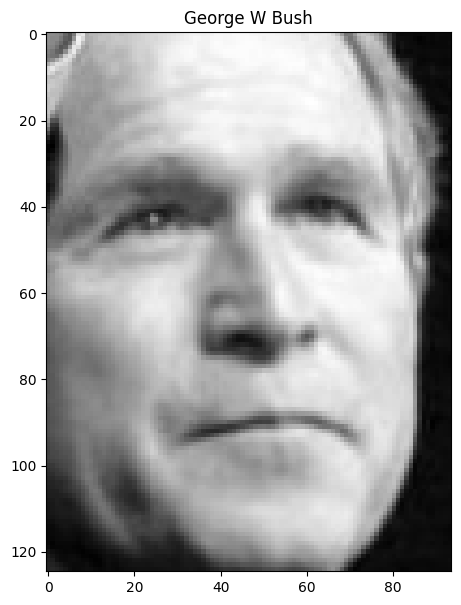

In [294]:
# Randomly select an image index
shown_id = np.random.randint(n_samples)
target = y[shown_id]
image = X[shown_id]

# Apply PCA transformation to the image
image_pca = pca.transform(image.reshape(1, -1))

# Apply LDA transform
image_lda = lda.transform(image.reshape(1, -1))
# Use the classifiers to predict the target name
predicted_target_log_pca = log.predict(image_pca)
predicted_target_ls_pca = ls.predict(image_pca)
predicted_target_log_lda = log_lda.predict(image_lda)

predicted_name_log = target_names[predicted_target_log_pca] 
predicted_name_ls = target_names[predicted_target_ls_pca]
predicted_name_log_lda = target_names[predicted_target_log_lda]

plt.imshow(image.reshape((h,w)), cmap="gray")
plt.title(target_names[target])

# Print the predicted target name and show the image
print('Predicted target Using PCA Logistic Regression:', predicted_name_log)
print('Predicted target Using Linear SVC of C=1000:', predicted_name_ls)
print('Predicted target Using LDA Logistic Regression:', predicted_name_log_lda)
plt.show()


`CONCLUSION: `<br>
For this image classification task, I aimed to achieve a `minimum accuracy `score of `85%`. After testing different models, I found that `Linear SVM `and `Logistic Regression `produced good results that are `worth mentioning `in the final prediction model. However, I am `particularly proud `of the `Linear Discriminant Analysis `(LDA) model, which achieved an impressive accuracy score of `98.84%`. LDA was able to reduce the dimensions of the data while maximizing the separation between the target classes, leading to `better classification performance`. Based on the successful tests I conducted, I believe this triple prediction model is capable of correctly identifying target names.